   PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch   Fare  \
0            1         0       2    male  15.354305      0      0  45.95   
1            2         1       2  female  36.627704      0      1  40.58   
2            3         1       3  female  34.073263      1      0  85.25   
3            4         0       2    male  43.409755      1      3  35.28   
4            5         0       2    male  18.927655      0      0  60.31   

  Embarked  
0        S  
1        S  
2        S  
3        S  
4        S  

--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  2000 non-null   int64  
 1   Survived     2000 non-null   int64  
 2   Pclass       2000 non-null   int64  
 3   Sex          2000 non-null   object 
 4   Age          1900 non-null   float64
 5   SibSp        2000 non-null   int64  
 6  

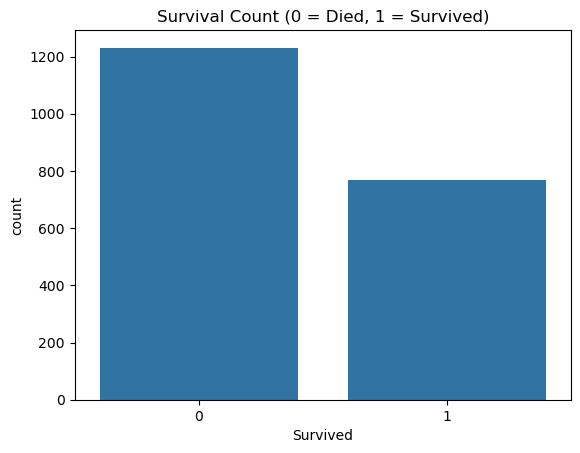

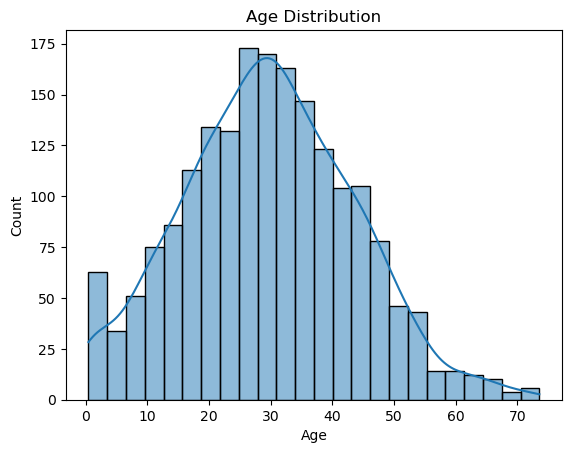

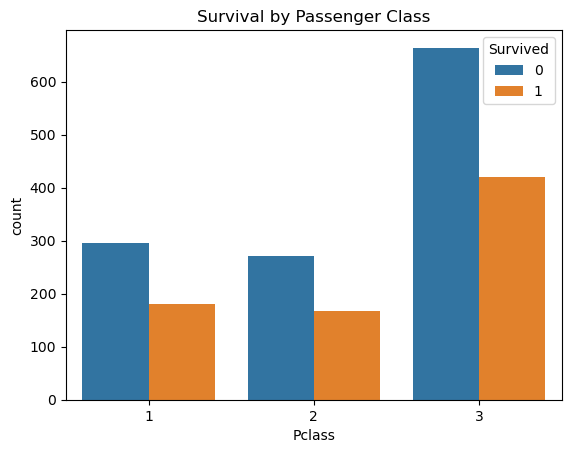

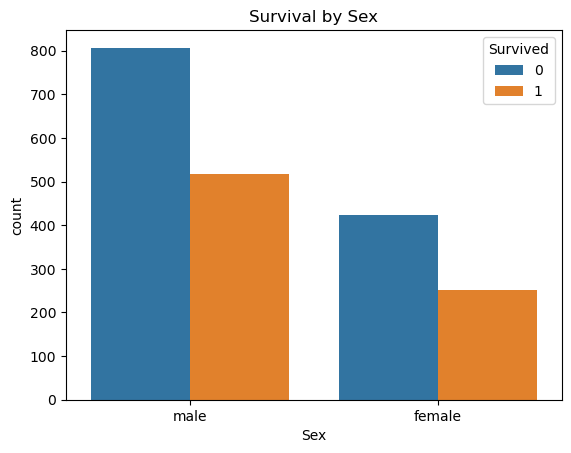

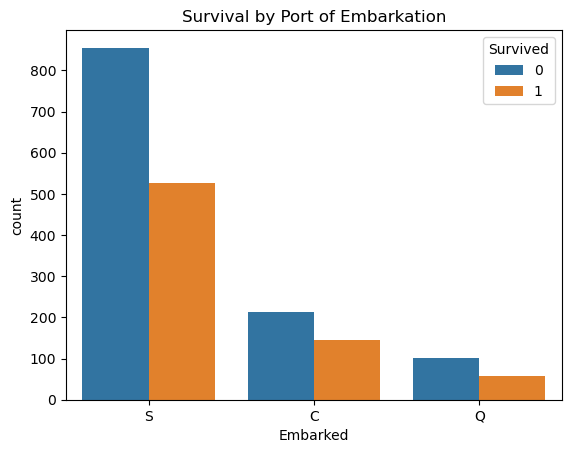


--- DATA CLEANING ---
Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

--- FEATURE ENGINEERING ---
New columns after encoding:
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

--- DATA PREPARATION ---
Training set shape: (1600, 9)
Test set shape: (400, 9)


/var/folders/qr/2mz0dfwj5j9b1nbtp5jdj2qc0000gn/T/ipykernel_10269/2686420204.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
/var/folders/qr/2mz0dfwj5j9b1nbtp5jdj2qc0000gn/T/ipykernel_10269/2686420204.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


titanic = pd.read_csv(r'/Users/nagnishal/Desktop/home work/TITANIC datset eda and feature engineering(data.csv')
print(titanic.head())

#data load
print("\n--- DATA INFO ---")
print(titanic.info())
#data sort
print("\n--- MISSING VALUES ---")
print(titanic.isnull().sum())
#data stats
print("\n--- SUMMARY STATISTICS ---")
print(titanic.describe())
#graph plot
sns.countplot(x='Survived', data=titanic)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

sns.histplot(titanic['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title("Survival by Passenger Class")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title("Survival by Sex")
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title("Survival by Port of Embarkation")
plt.show()

#data cleaing
print("\n--- DATA CLEANING ---")
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

titanic.drop(['PassengerId'], axis=1, inplace=True)

print("Missing values after cleaning:")
print(titanic.isnull().sum())


print("\n--- FEATURE ENGINEERING ---")
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

print("New columns after encoding:")
print(titanic.columns)


print("\n--- DATA PREPARATION ---")
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

